In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

cooking = pd.read_csv("/content/drive/MyDrive/Projectdata/Cooking_data_set.csv")
error = pd.read_csv("/content/drive/MyDrive/Projectdata/Error_Message.csv")
product = pd.read_csv("/content/drive/MyDrive/Projectdata/Product_Name.csv")
booking = pd.read_csv("/content/drive/MyDrive/Projectdata/booking_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
cooking_error= cooking.merge(error, left_on=['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명'], right_on=['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명'])
cooking_error

## cooking과 error를 merge를 한다

순번 생산라인코드      생산라인명        생산일자      품목코드  \
0     10   D004       PET병  2011-01-03  13D02080   
1      7   D011    2동 오리히로  2011-01-04  16A01016   
2      2   C002      쿠커 #2  2011-01-05  23K01321   
3     13   P004      PET#1  2011-01-05  13R02051   
4     17   C004      쿠커 #4  2011-01-10  23D02080   
...   ..    ...        ...         ...       ...   
1075   3   D084   2동 로타리#4  2021-10-25  13A00725   
1076   1   C045      쿠커 #5  2021-10-25  23U02003   
1077   7   D088  냉동밥 내포장#1  2021-10-28  1BA03709   
1078   1   D005      3.2마요  2021-10-28  16B06099   
1079   7   D087  냉동밥 내포장#2  2021-10-28  1BA03638   

                                          품목명 작업장코드      충전실온도        실링온도  \
0                                    참깨흑임자드레싱  W005  71.125831   93.425831   
1                                 시아스고구마샐러드믹스  W005  71.587470  103.987470   
2                                  나가사키베이스(재)  W003  70.540995  102.440995   
3                                 이마트베스트돈까스소스  W007  71.401189  111.901189   
4                                 참깨흑임자드레싱(재)  W003  70.649333  105.149333   
...                                       ...   ...        ...         ...   
1075                                  샘표강된장양념  W005  71.671267  112.571266   
1076                       유기아가베시럽665g/올가홀(재)  W003  69.827929   86.927929   
1077                                      NaN  W005  72.585609   93.885609   
1078                           맛있는골드마요네즈3.2kg  W005  71.764168  108.664168   
1079  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)  W005  70.610616  103.710616   

            쿠킹온도  쿠킹스팀압력     실링압력  생산시간   발생시간   종료시간  오류조치시간    비가동코드  \
0     127.878281  22.968  201.430   NaN  14:16  14:24       8  W0056B4   
1     138.736120  23.166  204.974   NaN  18:54  19:03       9  W005711   
2     137.135195  23.129  204.249   NaN   9:51   9:58       7  W003452   
3     146.585739  23.123  200.068   NaN  18:20  20:44     144  W0076B2   
4     139.680183  23.021  200.541   NaN  22:32   1:16     164  W003721   
...          ...     ...      ...   ...    ...    ...     ...      ...   
1075  147.339967  23.179  211.102   NaN   9:46  11:49     123  W005713   
1076  121.388229  22.974  200.317   NaN   8:58   9:04       6  W003446   
1077  128.549109  23.109  204.160   NaN   8:57   9:33      36  W0054F1   
1078  142.862968  22.799  201.039   NaN  10:50  11:06      16  W0058Z9   
1079  138.257466  23.031  199.343   NaN  14:15  14:35      20  W005722   

     Error_Message 오류발생작업장명  
0             위치조정      충전실  
1               대기      충전실  
2               충전      쿠킹실  
3              구동부      포장실  
4           충진 미종료      쿠킹실  
...            ...      ...  
1075            수리      충전실  
1076         ph 이상      쿠킹실  
1077         품목 교체      충전실  
1078            기타      충전실  
1079            공정      충전실  

[1080 rows x 19 columns]

In [ ]:
cooking_error[cooking_error.duplicated(subset=None, keep='first')]

# 336,337 // 338, 339 가 서로 공통 행이다. 그래서 336, 338만 남기고 337,339를 지운다 
# 온도,압력이 달라서 공통 행이 생겼다. 그래서 지운다.

순번 생산라인코드       생산라인명        생산일자      품목코드             품목명 작업장코드  \
337   1   D007  2동 6열컵실러#1  2015-12-30  16A06005  씨제이두부샐러드고구마-세트  W005   
339   1   D007  2동 6열컵실러#1  2015-12-30  16A06005  씨제이두부샐러드고구마-세트  W005   

         충전실온도        실링온도        쿠킹온도  쿠킹스팀압력     실링압력  생산시간  발생시간  종료시간  \
337  72.771924  123.871924  158.418674  23.031  198.956   NaN  7:10  8:15   
339  69.310376   79.110376  113.533276  22.949  203.543   NaN  7:10  8:15   

     오류조치시간    비가동코드 Error_Message 오류발생작업장명  
337      65  W005645           실린더      충전실  
339      65  W005645           실린더      충전실

In [ ]:
cooking_error.loc[336]

순번                            1
생산라인코드                     D007
생산라인명                2동 6열컵실러#1
생산일자                 2015-12-30
품목코드                   16A06005
품목명              씨제이두부샐러드고구마-세트
작업장코드                      W005
충전실온도                 72.771924
실링온도                 123.871924
쿠킹온도                 158.418674
쿠킹스팀압력                   23.031
실링압력                    198.956
생산시간                        NaN
발생시간                       7:10
종료시간                       8:15
오류조치시간                       65
비가동코드                   W005645
Error_Message               실린더
오류발생작업장명                    충전실
Name: 336, dtype: object

In [ ]:
cooking_error.loc[338]

순번                            1
생산라인코드                     D007
생산라인명                2동 6열컵실러#1
생산일자                 2015-12-30
품목코드                   16A06005
품목명              씨제이두부샐러드고구마-세트
작업장코드                      W005
충전실온도                 69.310376
실링온도                  79.110376
쿠킹온도                 113.533276
쿠킹스팀압력                   22.949
실링압력                    203.543
생산시간                        NaN
발생시간                       7:10
종료시간                       8:15
오류조치시간                       65
비가동코드                   W005645
Error_Message               실린더
오류발생작업장명                    충전실
Name: 338, dtype: object

In [ ]:
cooking_error = cooking_error.drop([337,339])
# 행 드랍시키기

In [ ]:
cooking_error.isnull().sum()

순번                  0
생산라인코드              0
생산라인명               0
생산일자                0
품목코드                2
품목명                 3
작업장코드               0
충전실온도               0
실링온도                0
쿠킹온도                0
쿠킹스팀압력              0
실링압력                0
생산시간             1074
발생시간                0
종료시간                0
오류조치시간              0
비가동코드               0
Error_Message       0
오류발생작업장명            0
dtype: int64

In [ ]:
cooking_error_set = cooking_error.drop(['순번','생산라인코드','품목코드','생산라인명','생산일자', '품목명','발생시간','종료시간','오류조치시간','비가동코드','오류발생작업장명','생산시간'], axis=1)
cooking_error_set.head()

작업장코드      충전실온도        실링온도        쿠킹온도  쿠킹스팀압력     실링압력 Error_Message
0  W005  71.125831   93.425831  127.878281  22.968  201.430          위치조정
1  W005  71.587470  103.987470  138.736120  23.166  204.974            대기
2  W003  70.540995  102.440995  137.135195  23.129  204.249            충전
3  W007  71.401189  111.901189  146.585739  23.123  200.068           구동부
4  W003  70.649333  105.149333  139.680183  23.021  200.541        충진 미종료

In [ ]:
cooking_error_set = cooking_error_set.dropna()

In [ ]:
cooking_error_set.isnull().sum()

작업장코드            0
충전실온도            0
실링온도             0
쿠킹온도             0
쿠킹스팀압력           0
실링압력             0
Error_Message    0
dtype: int64

In [ ]:
cooking_error_set

작업장코드      충전실온도        실링온도        쿠킹온도  쿠킹스팀압력     실링압력 Error_Message
0     W005  71.125831   93.425831  127.878281  22.968  201.430          위치조정
1     W005  71.587470  103.987470  138.736120  23.166  204.974            대기
2     W003  70.540995  102.440995  137.135195  23.129  204.249            충전
3     W007  71.401189  111.901189  146.585739  23.123  200.068           구동부
4     W003  70.649333  105.149333  139.680183  23.021  200.541        충진 미종료
...    ...        ...         ...         ...     ...      ...           ...
1075  W005  71.671267  112.571266  147.339967  23.179  211.102            수리
1076  W003  69.827929   86.927929  121.388229  22.974  200.317         ph 이상
1077  W005  72.585609   93.885609  128.549109  23.109  204.160         품목 교체
1078  W005  71.764168  108.664168  142.862968  22.799  201.039            기타
1079  W005  70.610616  103.710616  138.257466  23.031  199.343            공정

[1078 rows x 7 columns]

In [ ]:
cooking.head(3)

순번 생산라인코드  생산라인명        생산일자      품목코드             품목명 작업장코드      충전실온도  \
0   3   C001  쿠커 #1  2011-01-03  23K01312      서비스면양념장(재)  W003  71.669853   
1   1   C002  쿠커 #2  2011-01-03  23V00019  고구마샐러드믹스베이스(재)  W003  70.386480   
2  13   C003  쿠커 #3  2011-01-03  1.#JE+00   이마트가쓰오다시국물(재)  W003  71.206130   

         실링온도        쿠킹온도  쿠킹스팀압력     실링압력   생산시간  
0   96.769853  131.742003  23.315  201.844  70.37  
1  102.086480  136.926080  23.226  212.043  70.83  
2  112.306130  147.579680  23.516  208.781  73.55

In [ ]:
cooking_set = cooking.drop(['순번','생산라인코드','품목코드','생산라인명','생산일자', '품목명','생산시간'], axis=1)
cooking_set.head()

작업장코드      충전실온도        실링온도        쿠킹온도  쿠킹스팀압력     실링압력
0  W003  71.669853   96.769853  131.742003  23.315  201.844
1  W003  70.386480  102.086480  136.926080  23.226  212.043
2  W003  71.206130  112.306130  147.579680  23.516  208.781
3  W003  70.430565   96.030565  131.569165  23.692  208.269
4  W003  72.179319  114.079318  149.928068  23.899  211.625

In [ ]:
cooking_set = cooking_set.dropna()

In [ ]:
cooking_set.isnull().sum()

작업장코드     0
충전실온도     0
실링온도      0
쿠킹온도      0
쿠킹스팀압력    0
실링압력      0
dtype: int64

<ipython-input-20-e87dff2594cb>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,1)
<ipython-input-20-e87dff2594cb>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,2)
<ipython-input-20-e87dff2594cb>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

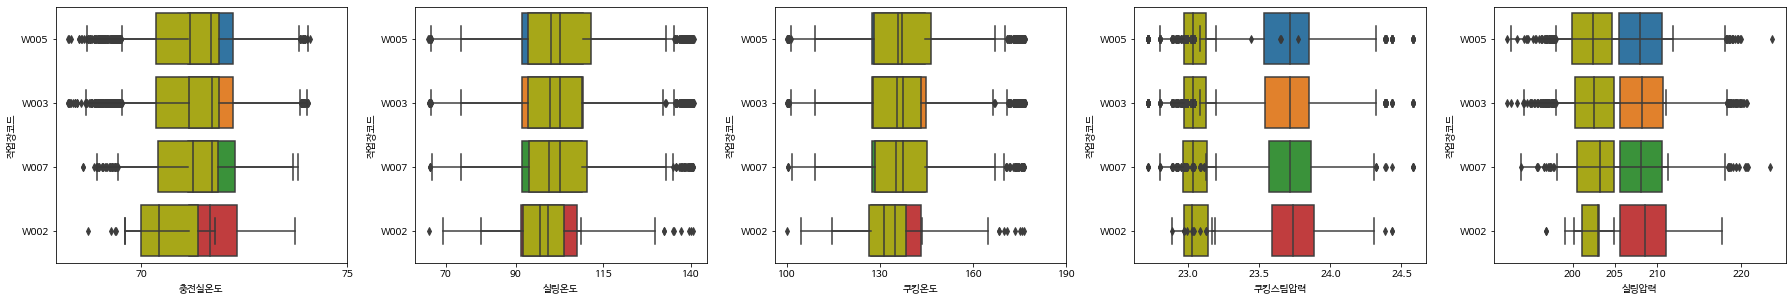

In [ ]:
plt.figure(figsize	=(25,8))

## 전체데이터

plt.subplot(2,5,1)
sns.boxplot(data=cooking_set, x = '충전실온도', y='작업장코드')

plt.subplot(2,5,2)
sns.boxplot(data=cooking_set, x = '실링온도', y='작업장코드')

plt.subplot(2,5,3)
sns.boxplot(data=cooking_set, x = '쿠킹온도', y='작업장코드')

plt.subplot(2,5,4)
sns.boxplot(data=cooking_set, x = '쿠킹스팀압력', y='작업장코드')

plt.subplot(2,5,5)
sns.boxplot(data=cooking_set, x = '실링압력', y='작업장코드')

## 오류 

plt.subplot(2,5,1)
sns.boxplot(data=cooking_error_set, x = '충전실온도', y='작업장코드', color='y')
plt.xticks([70, 75])

plt.subplot(2,5,2)
sns.boxplot(data=cooking_error_set, x = '실링온도', y='작업장코드', color='y')
plt.xticks([70, 90, 115, 140])

plt.subplot(2,5,3)
sns.boxplot(data=cooking_error_set, x = '쿠킹온도', y='작업장코드', color='y')
plt.xticks([100, 130, 160, 190])

plt.subplot(2,5,4)
sns.boxplot(data=cooking_error_set, x = '쿠킹스팀압력', y='작업장코드', color='y')
plt.xticks([23,23.5 ,24, 24.5])

plt.subplot(2,5,5)
sns.boxplot(data=cooking_error_set, x = '실링압력', y='작업장코드', color='y')
plt.xticks([200,205, 210, 220])

plt.tight_layout()

plt.show()

# 그래프 압력을 보여주며 권장 압력을 제시해준다.